<a href="https://colab.research.google.com/github/luang1t/dio-java-fundamentals/blob/main/projetoMatematicaA3_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a velocidade no asfalto (m/s): 5
Digite a velocidade na areia (m/s): 2
Digite a distância horizontal até a borda da areia (m): 100
Digite a distância vertical do ponto de entrada na areia até o ponto final (m): 50
--- Resumo para situação de socorro ---
Em uma situação de emergência, para minimizar o tempo e chegar o mais rápido possível ao ponto de socorro na areia:
- Percorra aproximadamente 78.18 metros sobre a superfície de asfalto.
- Após percorrer essa distância no asfalto, entre na área e siga em direção ao ponto de destino.
Este percurso otimizado resulta em um tempo total estimado de 42.91 segundos para chegar ao local.
Utilize esta informação para planejar a rota e otimizar o tempo de resposta.
-------------------------------------



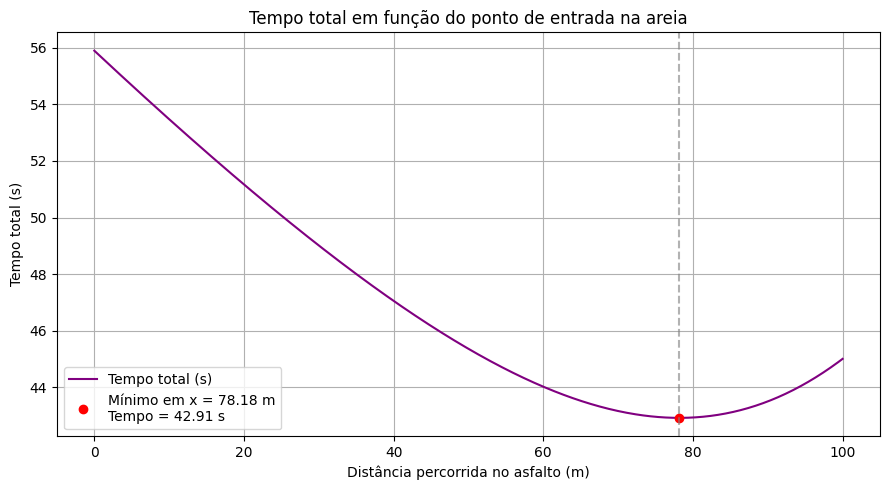

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Função que calcula o tempo total necessário para chegar ao ponto final
# passando por um trecho de asfalto e outro de areia
def calcular_tempo_total(distancia_percorrida_no_asfalto, velocidade_no_asfalto, velocidade_na_areia, distancia_horizontal_total, distancia_vertical_na_areia):

    distancia_percorrida_na_areia = np.sqrt((distancia_horizontal_total - distancia_percorrida_no_asfalto)**2 + distancia_vertical_na_areia**2)
    tempo_no_asfalto = distancia_percorrida_no_asfalto / velocidade_no_asfalto
    tempo_na_areia = distancia_percorrida_na_areia / velocidade_na_areia
    return tempo_no_asfalto + tempo_na_areia

# Entrada dos dados fornecidos pelo usuário
try:
    velocidade_no_asfalto = float(input("Digite a velocidade no asfalto (m/s): "))
    velocidade_na_areia = float(input("Digite a velocidade na areia (m/s): "))
    distancia_horizontal_total = float(input("Digite a distância horizontal até a borda da areia (m): "))
    distancia_vertical_na_areia = float(input("Digite a distância vertical do ponto de entrada na areia até o ponto final (m): "))
except ValueError:
    print("Entrada inválida. Por favor, digite apenas números.")
    exit()

# Geração de valores de distância no asfalto para simulação
valores_de_distancia_no_asfalto = np.linspace(0, distancia_horizontal_total, 500)

# Cálculo do tempo total para cada ponto de entrada possível na areia
tempos_totais = [
    calcular_tempo_total(distancia_no_asfalto, velocidade_no_asfalto, velocidade_na_areia, distancia_horizontal_total, distancia_vertical_na_areia)
    for distancia_no_asfalto in valores_de_distancia_no_asfalto
]

# Encontrar a melhor distância a ser percorrida no asfalto (que minimiza o tempo total)
resultado_otimizacao = minimize_scalar(
    calcular_tempo_total,
    bounds=(0, distancia_horizontal_total),
    args=(velocidade_no_asfalto, velocidade_na_areia, distancia_horizontal_total, distancia_vertical_na_areia),
    method='bounded'
)

melhor_distancia_no_asfalto = resultado_otimizacao.x
menor_tempo_total = resultado_otimizacao.fun

# Mostrar o resultado encontrado
print("--- Resumo para situação de socorro ---")
print(f"Em uma situação de emergência, para minimizar o tempo e chegar o mais rápido possível ao ponto de socorro na areia:")
print(f"- Percorra aproximadamente {melhor_distancia_no_asfalto:.2f} metros sobre a superfície de asfalto.")
print(f"- Após percorrer essa distância no asfalto, entre na área e siga em direção ao ponto de destino.")
print(f"Este percurso otimizado resulta em um tempo total estimado de {menor_tempo_total:.2f} segundos para chegar ao local.")
print("Utilize esta informação para planejar a rota e otimizar o tempo de resposta.")
print("-------------------------------------\n")

# Gerar gráfico do tempo total em função da distância percorrida no asfalto
plt.figure(figsize=(9, 5))
plt.plot(valores_de_distancia_no_asfalto, tempos_totais, label='Tempo total (s)', color='purple')
plt.plot(melhor_distancia_no_asfalto, menor_tempo_total, 'ro', label=f'Mínimo em x = {melhor_distancia_no_asfalto:.2f} m\nTempo = {menor_tempo_total:.2f} s')
plt.axvline(melhor_distancia_no_asfalto, linestyle='--', color='gray', alpha=0.6)
plt.xlabel('Distância percorrida no asfalto (m)')
plt.ylabel('Tempo total (s)')
plt.title('Tempo total em função do ponto de entrada na areia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()